<a href="https://colab.research.google.com/github/20JE0187/YOLOV5_OBJECT_DETECTION/blob/main/Yolov5_Wheat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/global-wheat-detection.zip

Archive:  /content/drive/MyDrive/global-wheat-detection.zip
  inflating: sample_submission.csv   
  inflating: test/2fd875eaa.jpg      
  inflating: test/348a992bb.jpg      
  inflating: test/51b3e36ab.jpg      
  inflating: test/51f1be19e.jpg      
  inflating: test/53f253011.jpg      
  inflating: test/796707dd7.jpg      
  inflating: test/aac893a91.jpg      
  inflating: test/cb8d261a3.jpg      
  inflating: test/cc3532ff6.jpg      
  inflating: test/f5a1f0358.jpg      
  inflating: train.csv               
  inflating: train/00333207f.jpg     
  inflating: train/005b0d8bb.jpg     
  inflating: train/006a994f7.jpg     
  inflating: train/00764ad5d.jpg     
  inflating: train/00b5c6764.jpg     
  inflating: train/00b5fefed.jpg     
  inflating: train/00b70a919.jpg     
  inflating: train/00e903abe.jpg     
  inflating: train/00ea5e5ee.jpg     
  inflating: train/010b216d4.jpg     
  inflating: train/010c93b99.jpg     
  inflating: train/010dbcc8f.jpg     
  inflating: train/0114c88aa

In [ ]:
!git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 12173, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 12173 (delta 0), reused 5 (delta 0), pack-reused 12167
Receiving objects: 100% (12173/12173), 11.91 MiB | 16.94 MiB/s, done.
Resolving deltas: 100% (8428/8428), done.


In [ ]:
!pwd

/content


In [ ]:
import os
os.chdir("/content/yolov5")
!pip install -r requirements.txt  

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 596 kB 33.7 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
import pandas as pd
import ast
import os
import shutil
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import numpy as np

In [ ]:
pwd

'/content/yolov5'

In [ ]:
data_path = "/content"
os.listdir(data_path)

['.config',
 'sample_submission.csv',
 'train',
 'yolov5',
 'train.csv',
 'drive',
 'test',
 'sample_data']

In [ ]:
df = pd.read_csv(os.path.join(data_path,"train.csv"))
df.head()

image_id  width  height                         bbox   source
0  b6ab77fd7   1024    1024   [834.0, 222.0, 56.0, 36.0]  usask_1
1  b6ab77fd7   1024    1024  [226.0, 548.0, 130.0, 58.0]  usask_1
2  b6ab77fd7   1024    1024  [377.0, 504.0, 74.0, 160.0]  usask_1
3  b6ab77fd7   1024    1024  [834.0, 95.0, 109.0, 107.0]  usask_1
4  b6ab77fd7   1024    1024  [26.0, 144.0, 124.0, 117.0]  usask_1

In [ ]:
df.bbox = df.bbox.apply(ast.literal_eval)
df.head()

image_id  width  height                         bbox   source
0  b6ab77fd7   1024    1024   [834.0, 222.0, 56.0, 36.0]  usask_1
1  b6ab77fd7   1024    1024  [226.0, 548.0, 130.0, 58.0]  usask_1
2  b6ab77fd7   1024    1024  [377.0, 504.0, 74.0, 160.0]  usask_1
3  b6ab77fd7   1024    1024  [834.0, 95.0, 109.0, 107.0]  usask_1
4  b6ab77fd7   1024    1024  [26.0, 144.0, 124.0, 117.0]  usask_1

In [ ]:
df = df.groupby("image_id")["bbox"].apply(list).reset_index(name="bboxes")
df.head()

image_id                                             bboxes
0  00333207f  [[0, 654, 37, 111], [0, 817, 135, 98], [0, 192...
1  005b0d8bb  [[765.0, 879.0, 116.0, 79.0], [84.0, 539.0, 15...
2  006a994f7  [[437.0, 988.0, 98.0, 36.0], [309.0, 527.0, 11...
3  00764ad5d  [[89.0, 256.0, 113.0, 107.0], [216.0, 282.0, 1...
4  00b5fefed  [[709.0, 97.0, 204.0, 105.0], [775.0, 250.0, 1...

# Albumentations

In [ ]:
!pip install -q -U albumentations

     |████████████████████████████████| 102 kB 34.2 MB/s 
     |████████████████████████████████| 47.8 MB 1.2 MB/s 


In [ ]:
pip uninstall opencv-python-headless

Found existing installation: opencv-python-headless 4.5.5.64
Uninstalling opencv-python-headless-4.5.5.64:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/cv2/*
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless-4.5.5.64.dist-info/*
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavcodec-65fa80df.so.58.134.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavformat-8ef5c7db.so.58.76.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavutil-9c768859.so.56.70.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libbz2-a273e504.so.1.0.6
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libcrypto-09fe7800.so.1.1
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libgfortran-91cc3cb1.so.3.0.0
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libopenblas-r0-f650aae0.3.3.so
    /usr/local/lib/python3.7/dis

In [ ]:
pip install opencv-python-headless==4.1.2.30

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 21.8 MB 1.4 MB/s 


In [ ]:
df.head()

image_id                                             bboxes
0  00333207f  [[0, 654, 37, 111], [0, 817, 135, 98], [0, 192...
1  005b0d8bb  [[765.0, 879.0, 116.0, 79.0], [84.0, 539.0, 15...
2  006a994f7  [[437.0, 988.0, 98.0, 36.0], [309.0, 527.0, 11...
3  00764ad5d  [[89.0, 256.0, 113.0, 107.0], [216.0, 282.0, 1...
4  00b5fefed  [[709.0, 97.0, 204.0, 105.0], [775.0, 250.0, 1...

In [ ]:
df_aug = df.copy()
df_aug.head()

image_id                                             bboxes
0  00333207f  [[0, 654, 37, 111], [0, 817, 135, 98], [0, 192...
1  005b0d8bb  [[765.0, 879.0, 116.0, 79.0], [84.0, 539.0, 15...
2  006a994f7  [[437.0, 988.0, 98.0, 36.0], [309.0, 527.0, 11...
3  00764ad5d  [[89.0, 256.0, 113.0, 107.0], [216.0, 282.0, 1...
4  00b5fefed  [[709.0, 97.0, 204.0, 105.0], [775.0, 250.0, 1...

In [ ]:
for _,row in df_aug.iterrows():
  row['image_id'] = row['image_id']+"_aug"
df_aug.head()

image_id                                             bboxes
0  00333207f_aug  [[0, 654, 37, 111], [0, 817, 135, 98], [0, 192...
1  005b0d8bb_aug  [[765.0, 879.0, 116.0, 79.0], [84.0, 539.0, 15...
2  006a994f7_aug  [[437.0, 988.0, 98.0, 36.0], [309.0, 527.0, 11...
3  00764ad5d_aug  [[89.0, 256.0, 113.0, 107.0], [216.0, 282.0, 1...
4  00b5fefed_aug  [[709.0, 97.0, 204.0, 105.0], [775.0, 250.0, 1...

In [ ]:
df_aug.shape

(3373, 2)

In [ ]:
df = df.append(df_aug)
df.tail()

image_id                                             bboxes
3368  ffb445410_aug  [[0.0, 534.0, 54.0, 118.0], [0.0, 480.0, 38.0,...
3369  ffbf75e5b_aug  [[0, 697, 21, 58], [104, 750, 77, 75], [65, 84...
3370  ffbfe7cc0_aug  [[256.0, 0.0, 64.0, 99.0], [390.0, 0.0, 48.0, ...
3371  ffc870198_aug  [[447.0, 976.0, 78.0, 48.0], [18.0, 141.0, 218...
3372  ffdf83e42_aug  [[306.0, 178.0, 67.0, 88.0], [367.0, 167.0, 63...

In [ ]:
len(os.listdir("/content/train"))

3422

In [ ]:
import albumentations as A
import matplotlib.pyplot as plt
import cv2
from PIL import Image as im
transform = A.Compose([
    A.RandomBrightnessContrast(p=0.8),
    A.RandomSunFlare()
])
# bboxes_coord = []
# for x in df.bboxes.iloc[0]:
#     bboxes_coord.append(x)
# print(bboxes_coord)
# chosen_image = cv2.imread("/content/train/00333207f.jpg")[:,:,::-1]
# augmented_image = transform(image=chosen_image)['image']
# # plt.imshow(augmented_image)
# # augmented_image.shape
# data = im.fromarray(augmented_image)
for row in range(0,3373):
  image_name = df.iloc[row][0]
  image_path = "/content/train"
  chosen_image = cv2.imread(os.path.join(image_path,f"{image_name}.jpg"))[:,:,::-1]
  augmented_image = transform(image=chosen_image)['image']
  image_aug = im.fromarray(augmented_image)
  image_aug_name = image_name+"_aug.jpg"
  image_aug.save("/content/train/"+image_aug_name)



In [ ]:
len(os.listdir("/content/train"))

6795

In [ ]:
!pwd

/content/yolov5


In [ ]:
df_train,df_valid = train_test_split(df,test_size=0.33,random_state=42,shuffle=True)

In [ ]:
df_train.shape

(4519, 2)

In [ ]:
df_train.head()

image_id                                             bboxes
3313      fb5867958  [[44.0, 138.0, 65.0, 74.0], [0.0, 109.0, 36.0,...
898       46b7a42f3  [[417.0, 510.0, 66.0, 85.0], [0.0, 410.0, 20.0...
428       2277ae74f  [[23.0, 678.0, 100.0, 97.0], [117.0, 976.0, 82...
1277  623f804bb_aug  [[967.0, 311.0, 57.0, 88.0], [882.0, 238.0, 67...
2569      c34dd05a3  [[0.0, 525.0, 88.0, 108.0], [175.0, 606.0, 74....

In [ ]:
df_valid.shape

(2227, 2)

In [ ]:
df_train = df_train.reset_index(drop=True)
df_valid = df_valid.reset_index(drop=True)

In [ ]:
df_train.head()

image_id                                             bboxes
0      fb5867958  [[44.0, 138.0, 65.0, 74.0], [0.0, 109.0, 36.0,...
1      46b7a42f3  [[417.0, 510.0, 66.0, 85.0], [0.0, 410.0, 20.0...
2      2277ae74f  [[23.0, 678.0, 100.0, 97.0], [117.0, 976.0, 82...
3  623f804bb_aug  [[967.0, 311.0, 57.0, 88.0], [882.0, 238.0, 67...
4      c34dd05a3  [[0.0, 525.0, 88.0, 108.0], [175.0, 606.0, 74....

In [ ]:
!pwd

/content/yolov5


In [ ]:
!mkdir wheat_data

In [ ]:
pwd

'/content/yolov5'

In [ ]:
!mkdir wheat_data/images

In [ ]:
!mkdir wheat_data/labels

In [ ]:
pwd

'/content/yolov5'

In [ ]:
!mkdir wheat_data/images/train

In [ ]:
!mkdir wheat_data/images/validation

In [ ]:
!mkdir wheat_data/labels/train

In [ ]:
!mkdir wheat_data/labels/validation

In [ ]:
pwd

'/content/yolov5'

In [ ]:
output_path = "/content/yolov5/wheat_data"

In [ ]:
os.listdir(output_path)

['images', 'labels']

In [ ]:
def process_data(data,data_type="train"):
    for _,row in tqdm(data.iterrows(),total=len(data)):
        image_name = row['image_id']
        bounding_boxes = row['bboxes']
        yolo_data=[]
        for bbox in bounding_boxes:
            x = bbox[0]
            y = bbox[1]
            w = bbox[2]
            h = bbox[3]
            x_center = x+w/2
            y_center = y+h/2
            x_center /= 1024.0
            y_center /= 1024.0
            w/=1024.0
            h/=1024.0
            yolo_data.append([0,x_center,y_center,w,h])
        yolo_data = np.array(yolo_data)
        np.savetxt(os.path.join(output_path,f"labels/{data_type}/{image_name}.txt"),yolo_data,fmt=["%d","%f","%f","%f","%f"])
        shutil.copyfile(os.path.join(data_path,f"train/{image_name}.jpg"),os.path.join(output_path,f"images/{data_type}/{image_name}.jpg"))
        

In [ ]:
process_data(df_train,data_type="train")
process_data(df_valid,data_type="validation")

100%|██████████| 2227/2227 [00:02<00:00, 817.55it/s]


In [ ]:
!pwd

/content/yolov5


In [ ]:
os.listdir("/content/yolov5")

['aug.jpg',
 'export.py',
 '.github',
 'LICENSE',
 'detect.py',
 '.gitignore',
 'models',
 'requirements.txt',
 'data',
 'setup.cfg',
 '.pre-commit-config.yaml',
 'val.py',
 'tutorial.ipynb',
 '.git',
 'hubconf.py',
 'wheat_data',
 '.gitattributes',
 'train.py',
 'utils',
 'README.md',
 'CONTRIBUTING.md']

In [ ]:
!pwd

/content/yolov5


In [ ]:
yaml_dict = {'train': 'wheat_data/images/train',   # path to the train folder
            'val': 'wheat_data/images/validation', # path to the val folder
            'nc': 1,                             # number of classes
            'names': ["wheat"]}       

In [ ]:
import yaml

with open(r'wheat.yaml', 'w') as file:
    documents = yaml.dump(yaml_dict, file)

In [ ]:
!python train.py --img 1024 --batch 8 --epochs 5 --data wheat.yaml --cfg models/yolov5s.yaml --name wheatmodel

train: weights=yolov5s.pt, cfg=models/yolov5s.yaml, data=wheat.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=5, batch_size=8, imgsz=1024, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=wheatmodel, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-244-g47233e1 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=

In [ ]:
os.listdir("runs/train/wheatmodel")

['R_curve.png',
 'val_batch0_pred.jpg',
 'hyp.yaml',
 'opt.yaml',
 'train_batch1.jpg',
 'val_batch2_pred.jpg',
 'val_batch0_labels.jpg',
 'events.out.tfevents.1654369683.728d97d88926.1211.0',
 'labels.jpg',
 'val_batch1_labels.jpg',
 'PR_curve.png',
 'F1_curve.png',
 'results.csv',
 'val_batch2_labels.jpg',
 'train_batch0.jpg',
 'train_batch2.jpg',
 'confusion_matrix.png',
 'val_batch1_pred.jpg',
 'labels_correlogram.jpg',
 'results.png',
 'weights',
 'P_curve.png']

In [ ]:
os.listdir("runs/train/wheatmodel/weights")

['best.pt', 'last.pt']

In [ ]:
!python detect.py --source /content/test --weights runs/train/wheatmodel/weights/best.pt

detect: weights=['runs/train/wheatmodel/weights/best.pt'], source=/content/test, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-244-g47233e1 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/10 /content/test/2fd875eaa.jpg: 640x640 29 wheats, Done. (0.013s)
image 2/10 /content/test/348a992bb.jpg: 640x640 37 wheats, Done. (0.013s)
image 3/10 /content/test/51b3e36ab.jpg: 640x640 25 wheats, Done. (0.013s)
image 4/10 /content/test/51f1be19e.jpg: 640x640 20 wheats, Done. (0.013s)
image 5/10 /content/test/53f253011.jpg: 640x640 30 wheats, Do

In [ ]:
os.listdir("runs/detect/exp")

['2fd875eaa.jpg',
 '348a992bb.jpg',
 'f5a1f0358.jpg',
 'cb8d261a3.jpg',
 'aac893a91.jpg',
 '796707dd7.jpg',
 '51b3e36ab.jpg',
 'cc3532ff6.jpg',
 '51f1be19e.jpg',
 '53f253011.jpg']

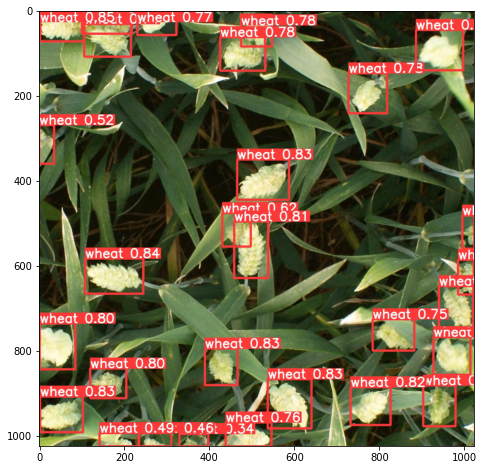

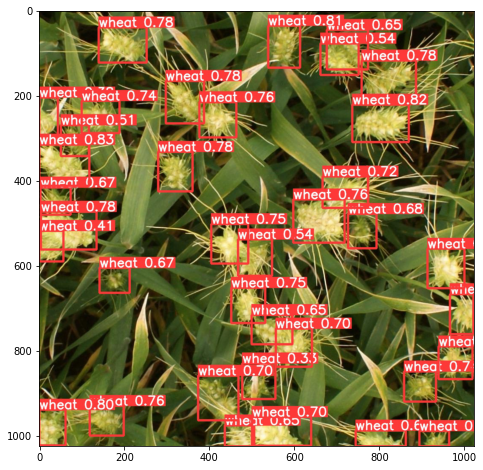

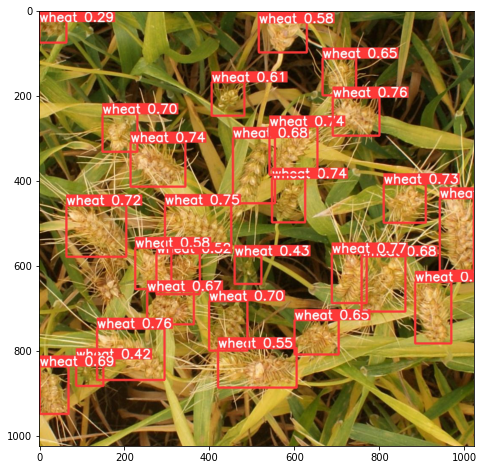

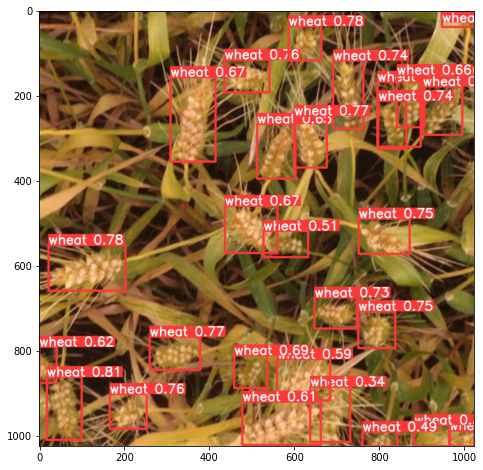

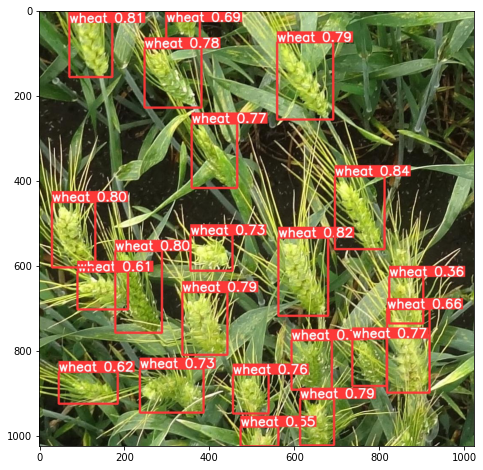

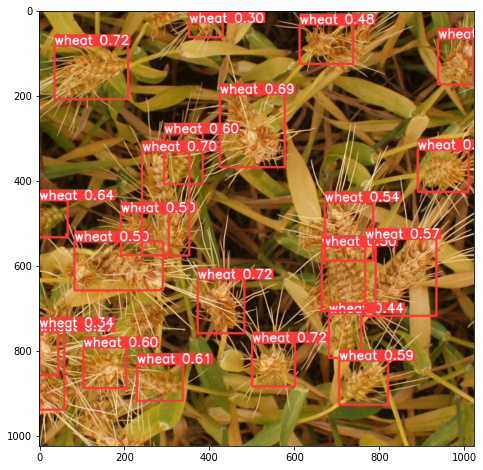

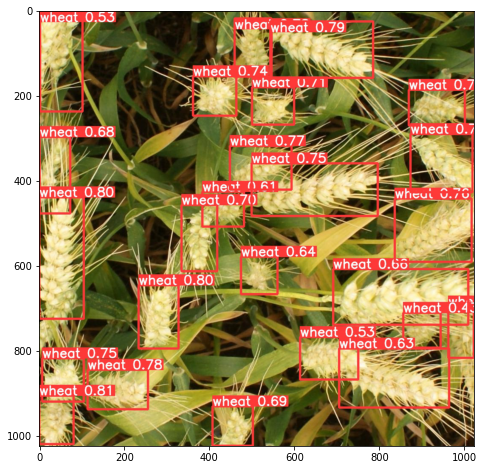

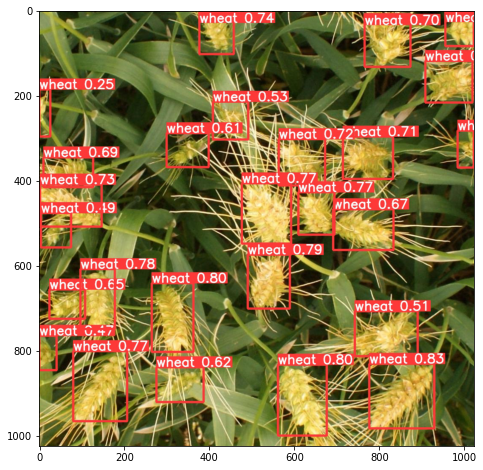

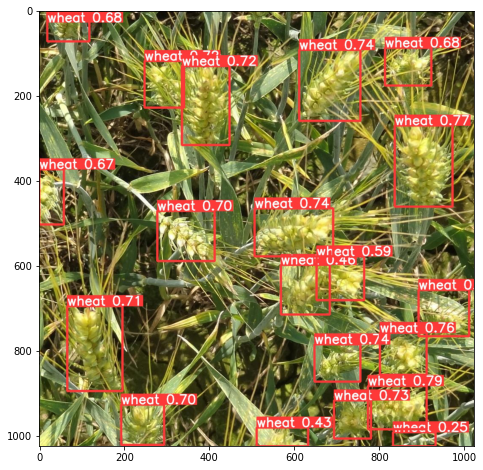

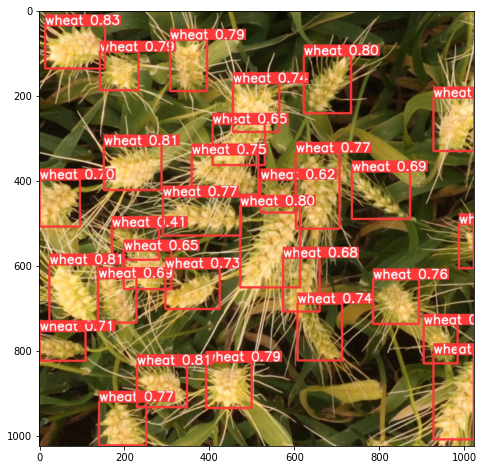

In [ ]:
# One mosaic batch of train images with labels
import matplotlib.pyplot as plt
for img in os.listdir("runs/detect/exp"):
  plt.figure(figsize = (8, 8))
  plt.imshow(plt.imread(f'runs/detect/exp/{img}'))